In [209]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
from sklearn import preprocessing
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [210]:
df = pd.read_csv("cereals.csv", na_values=-1)


In [211]:
df2 = df.copy()


In [212]:
normalize_list = ['calories','protein', 'fat', 'sodium', 'fiber', 'carbo','sugars','potass', 'vitamins', 'cups'] 

In [213]:
df2.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100%_Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33
1,100%_Natural_Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1.00
2,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.50
4,Almond_Delight,R,C,110,2,2,200,1,14,8,NaN,25,3,1,0.75


In [214]:
df2.loc[(df2["potass"].isnull()), "potass"] = df2.potass.median()
df2.loc[(df2["carbo"].isnull()), "carbo"] = df2.carbo.median()
df2.loc[(df2["sugars"].isnull()), "sugars"] = df2.sugars.median()

In [215]:
for col in df2.ix[:,normalize_list].columns:
        df2[col] = (df2[col] * (1/ df2['cups']))

In [216]:
cereals = df2.copy()
cereals.drop(['name'], 1, inplace=True)

In [217]:
#Get dummy fields
cereals = pd.get_dummies(cereals, columns=['mfr','type'])

In [218]:
pca = PCA(n_components=2)
pca.fit(cereals)
reduced_cereals = pca.transform(cereals)

In [219]:
kmeans = KMeans(n_clusters=4, max_iter=20)
y_pred = kmeans.fit_predict(cereals[normalize_list])

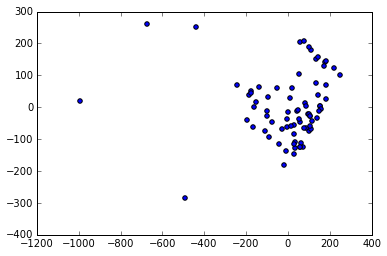

In [220]:
plot.scatter(reduced_cereals[:, 0], reduced_cereals[:, 1])
plot.title("")
plot.show()

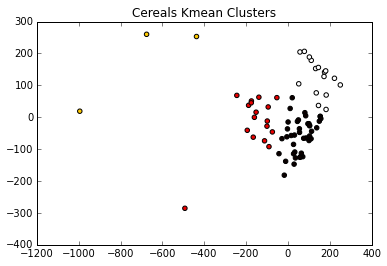

In [221]:
plot.scatter(reduced_cereals[:, 0], reduced_cereals[:, 1], c=y_pred, cmap="hot")
plot.title("Cereals Kmean Clusters")
plot.show()

In [222]:
group = list(zip(df2['name'], y_pred))
group = pd.DataFrame(group)
group.rename(columns={0: 'names', 1: 'groups'}, inplace=True)
cereals = cereals.join(group)
cereals_pivot = cereals.pivot_table(columns='groups', values=normalize_list)

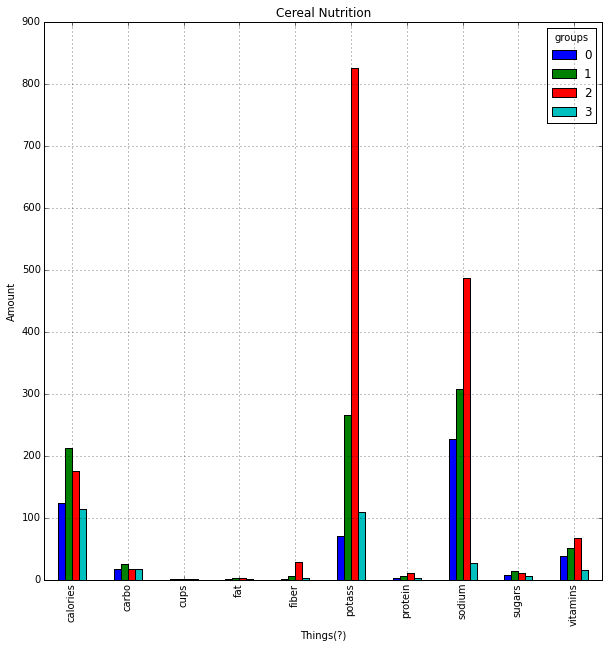

In [223]:
cereals_pivot.plot(kind='bar', figsize=(10, 10))
plot.xlabel('Things(?)')
plot.ylabel('Amount')
plot.title('Cereal Nutrition')
plot.show()

#Conclusions

##Group 1 is cereals kids don't like but parents think are healty. Kix and Lfe and the other stuff you'd try to get your friends to eat so you could have more of the good stuff. The exception being Fruity Pebbles. How they ended up here, I don't know.

In [224]:
print(cereals[cereals['groups'] == 0]['names'].get_values())

['Almond_Delight' 'Apple_Cinnamon_Cheerios' 'Apple_Jacks' 'Basic_4'
 "Cap'n'Crunch" 'Cheerios' 'Cinnamon_Toast_Crunch' 'Cocoa_Puffs'
 'Corn_Chex' 'Corn_Flakes' 'Count_Chocula' 'Crispix'
 'Crispy_Wheat_&_Raisins' 'Double_Chex' 'Froot_Loops' 'Frosted_Flakes'
 'Fruity_Pebbles' 'Golden_Grahams' 'Grape_Nuts_Flakes' 'Honey_Graham_Ohs'
 'Honey_Nut_Cheerios' 'Honey-comb' 'Just_Right_Crunchy__Nuggets'
 'Just_Right_Fruit_&_Nut' 'Kix' 'Life' 'Lucky_Charms'
 'Muesli_Raisins,_Peaches,_&_Pecans' 'Multi-Grain_Cheerios'
 'Nut&Honey_Crunch' 'Nutri-grain_Wheat' 'Product_19' 'Rice_Chex'
 'Rice_Krispies' 'Special_K' 'Total_Corn_Flakes' 'Total_Whole_Grain'
 'Triples' 'Trix' 'Wheaties' 'Wheaties_Honey_Gold']


##Group 0 is the Adventous old person's cereal. It contains such tasty treats as Bran_chex, and Raisin nut bran. It pairs best with prune juice and wearing socks with sandles.

In [225]:
print(cereals[cereals['groups'] == 1]['names'].get_values())

['Bran_Chex' 'Bran_Flakes' 'Clusters' "Cracklin'_Oat_Bran"
 'Fruit_&_Fibre_Dates,_Walnuts,_and_Oats' 'Fruitful_Bran' 'Grape-Nuts'
 'Great_Grains_Pecan' 'Mueslix_Crispy_Blend' 'Nutri-Grain_Almond-Raisin'
 'Oatmeal_Raisin_Crisp' 'Post_Nat._Raisin_Bran' 'Quaker_Oat_Squares'
 'Raisin_Bran' 'Raisin_Nut_Bran' 'Total_Raisin_Bran' 'Wheat_Chex']


##Group 2 is the straight-up Bran group.  So much bran no other cereals want to be near it

In [226]:
print(cereals[cereals['groups'] == 2]['names'].get_values())

['100%_Bran' 'All-Bran' 'All-Bran_with_Extra_Fiber']


##Group 3 Is the Kids group. Count Chocula, cinnamon toast crunch, cocoa puffs. This is where it is at. with the exception of some crappy special K, this is a good group

In [227]:
print(cereals[cereals['groups'] == 3]['names'].get_values())

['100%_Natural_Bran' 'Corn_Pops' 'Cream_of_Wheat_(Quick)'
 'Frosted_Mini-Wheats' 'Golden_Crisp' 'Maypo'
 'Muesli_Raisins,_Dates,_&_Almonds' 'Puffed_Rice' 'Puffed_Wheat'
 'Quaker_Oatmeal' 'Raisin_Squares' 'Shredded_Wheat'
 "Shredded_Wheat_'n'Bran" 'Shredded_Wheat_spoon_size' 'Smacks'
 'Strawberry_Fruit_Wheats']
